##Beta Distribution 

Please view this notebook at: 
http://nbviewer.ipython.org/github/keshr3106/ipython-notebooks/blob/master/beta_distribution.ipynb
as animated plots are not supported in Github's IPython Notebook view.

Note : 

* The following is simply a reproduction of the brilliant explanation of the intuition behind beta distribution given by David Robinson at http://stats.stackexchange.com/questions/47771/what-is-the-intuition-behind-beta-distribution.
* This is just a personal attempt to use an IPython notebook to explain the same and also to improve my python, probability and statistics chops by implementing the beta distributions.
* The animated plotting is used from Jake's post on embedding animated plots in IPython notebooks:
http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/
* A detailed discussion of Bayesian probability using an example can be found at this notebook:
http://nbviewer.ipython.org/github/kramaswamyxu/Notebooks/blob/master/euro_problem.ipynb

#### Application of Beta distributions in batting averages

* The beta distribution can be best understood by an example of batting averages in baseball.
* Imagine we have a situation, where we have to predict the season-long average of a baseball player. We can estimate this by his current average so far - but this will be a poor estimate at the start of a season. For example, a player may have an average of 1.00 if he gets a single in his first bat or can be 0 if he strikes out in his first bat. But a player is unlikely to end up with an average as high of 1.00 or as low of 0.00.
* We basically try to estimate the average using **prior expectations**, meaning we use a pre-concieved opinion in our mind already of how much the average will be(in other words, we use a prior). The prior we assume to estimate must be accurate enough - using the prior to estimate too early can lead to a poor estimate, while we find that we can get a better estimate of the average as the season progresses - this is because our notion gets updated with every single time he plays.
* This notion can be best represented by a beta distribution - basically a continous distribution of the probablities of the average in this case.
* In baseball, an average batting average is around the value of 0.266 and 0.300 is considered to a good batting average. We use this knowledge or *prior* to model our estimation of the baseball average to the end of season.
* Usually a player's batting average hovers between 0.21 to 0.35 and is most likely to be around 0.27 - this prior knowledge can be modelled using the beta distribution: $ \beta $($ \alpha $,$ \beta $) where $ \alpha $ = 81 and $ \beta $ = 219.

#### How do we arrive at these parameters?

* The mean of a beta distribution is given by $ \alpha $ / ( $ \alpha $ + $ \beta $) - We expect this mean in this case to be around 0.266.
* 81/ ( 81 + 219) gives a close enough value of 0.270. 
* Thus the values of parameters chosen are 81 and 219 respectively.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np

In [2]:
def create_beta_dist(df,alpha_param, beta_param, type_distribution):
    """
    creates a beta prior using the given parametes alpha and beta
    """
    beta_dist = beta(alpha_param, beta_param)
    df[type_distribution] = beta_dist.pdf(np.linspace(0,1, len(df)))
    return beta_dist, df

In [3]:
def plot_beta_dist(df, type_distribution):
    """
    plots the beta prior distribution
    """
    if type_distribution is 'beta_prior':
        plt.plot(df.prob,df.beta_prior, label = type_distribution)
        plt.xlim([0.15, 0.4])
        plt.legend(loc='upper right')
    else:
        plt.plot(df.prob,df.beta_posterior, label = type_distribution)
        plt.xlim([0.15, 0.4])
        plt.legend(loc='upper right')

Defining the range of plays to be from 1 to 600 - the number of times the player is expected to bat throughout a season. 
This can be any number as we need only the probabilites - which is obtained by normalizing the range to 0 and 1.

In [4]:
range_hyp = range(0,601)
df = pd.DataFrame()
df['hyp'] = range_hyp
df['prob'] = np.linspace(0,1, len(df))

Creating a beta distribution instance of parameters 81 and 219.

In [5]:
beta_dist, df =  create_beta_dist(df,81,219,'beta_prior')

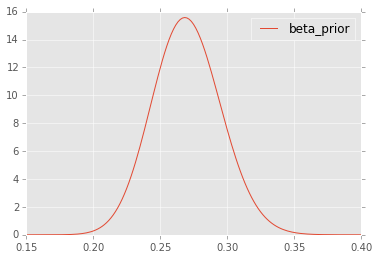

In [6]:
plot_beta_dist(df, 'beta_prior')

The above curve represents a beta prior distribution for parameters $ \alpha $ and $ \beta $ equal to 81 and 219 respectively. 

#### Observations from the curve:
* The mean of the distribution is observed to be around 0.265.
* The entire distribution hovers between 0.20 and 0.35.

In [7]:
get_mean = lambda rv: rv.mean()
get_confidence_interval = lambda rv: rv.interval(0.90)

* The theoretical mean gives a value of 0.27

In [8]:
print get_mean(beta_dist)

0.27


* The theoretical confidence interval also falls in a similar range.

In [9]:
print get_confidence_interval(beta_dist)

(0.22879015048710477, 0.31295608115033535)


Thus, the computed values of mean and confidence interval confirm the above hypotheses.

### How the beta distribution changes with each update

* So right now we have a prior expectation of the player's average to be around 0.27  - this is thus modelled using a beta distribution.

* Let's assume the player now goes out to play and gets a single hit - his record is 1 play, 1 hit.

* Now the probablities have to updated - in view of the observations we make. Basically as we keep observing, our estimate starts to change accordingly. ( Note: as of now, before the first observation, our estimate using our prior knowledge is the above obtained curve and its estimates)

* Now the parameters are basically 81 + 1 and 219. The observation gives 1 hit and no misses

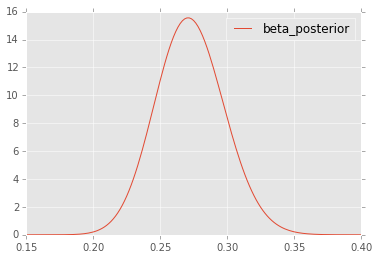

In [10]:
beta_dist, df =  create_beta_dist(df,82,219, 'beta_posterior')
plot_beta_dist(df,'beta_posterior')

In [11]:
print get_mean(beta_dist)

0.272425249169


In [12]:
print get_confidence_interval(beta_dist)

(0.23115444623570727, 0.31541813007537933)


* The above curve shows the updated distribution - it is no longer a 'prior' distribution, it instead becomes a posterior distribution, which updates itself on seeing new data.
* Though there isn't visually much of a difference between the above 2 curves, it is obvious from the computed estimates of the curves - mean and confidence interval that the distribution has moved *slightly* towards the right.

* The mean earlier was 0.270, it has now increased to 0.272 - the increase intuitively is quite obvious too 
as our estimate of the average will improve as he makes more hits than missed. 
* Since the observed data is now 1 hit and no miss, the posterior distribution gets updated accordingly reflecting our new(updated) beliefs.

* The interesting property of beta distributions is that the prior and posterior of a beta distribution is of 
the same type. That is, if a distribution has a beta prior, then it will have a beta posterior too!
* Also, finding the beta posterior is basically equivalent to updating the $ \alpha $ and $ \beta $ parameters to reflect the change. 

* So Beta_posterior = Beta( $ \alpha $_prior + successes, $ \beta $_prior + failures)  
* Any example which invloves the events of successes and failures can be modelled using beta distribution.

* Coming back to the baseball example, the success is defined as a hit and the failure is defined as a miss.This means that the beta posterior gets updated according to the number of hits and misses observed every time.
* So in this example, Beta_posterior = Beta( $ \alpha $_prior + hits, $ \beta $_prior + misses)

* As the course of the season goes by, we observe the number of hits and misses. 
* Say by the half season, the player has 100 hits and 200 misses out of a total 300 plays totally.

* Intuitively, hour estimate of his final average will improve and we will have a better range of estimate,
in other words, the confidence interval observed before will narrow as our beliefs get updated as the season progresses.

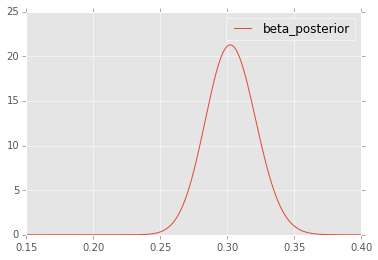

In [13]:
beta_dist, df =  create_beta_dist(df,182,419, 'beta_posterior')
plot_beta_dist(df,'beta_posterior')

In [14]:
print get_mean(beta_dist)

0.302828618968


In [15]:
print get_confidence_interval(beta_dist)

(0.27239942630940084, 0.33400448649598991)


* As it can be observed, the mean gets increased from 0.27 to 0.30 and the confidence interval gets more accurate.

* As more data is observed, the curve gets more narrow - our estimate basically becomes better with each update.

### Animation of the beta posterior as it gets updated after each observation 

In [16]:
from matplotlib import animation, pyplot as plt
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls autoplay>
 <source src="data:{0}">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.m4v') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        anim._encoded_video = 'video/mp4;base64,' + video.encode("base64")
    # prevent figure displayed as a PNG below the animation
    plt.close()
    
    return VIDEO_TAG.format(anim._encoded_video)

animation.Animation._repr_html_ = anim_to_html

In [17]:
import matplotlib.animation as animation
import random
def init():
    line.set_data([], [])
    return line,

def calc_parameters(i):
    alpha_param = 81
    beta_param = 219
    for j in range(0,i):
        if l[j] is 'H':
            alpha_param = alpha_param + 1
        else:
            beta_param =  beta_param + 1    
    return alpha_param, beta_param

def animate(i):
    alpha_param, beta_param = calc_parameters(i)
    if l[i] is 'H':
        alpha_param = alpha_param + 1
    else:
        beta_param =  beta_param + 1
    beta_dist = beta(alpha_param, beta_param)
    y = beta_dist.pdf(x)
    line.set_data(x, y)
    return line,alpha_param, beta_param

def randomly(seq):
    shuffled = list(seq)
    random.shuffle(shuffled)
    return shuffled

fig = plt.figure()
ax = plt.axes(xlim=(0.15, 0.45), ylim = (0,26))
x = np.linspace(0,1,600)
alpha_param, beta_param = calc_parameters(0)
beta_dist = beta(alpha_param, beta_param)

y = beta_dist.pdf(x)
line, = ax.plot(x, y, lw=2, label='beta_posterior')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-small')
l = randomly('H'* 200 + 'T' * 400)
list_means = []
    
animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=20, blit=True)

<source src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAHfV21kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ2IHIyNTU1IDBjMjE0ODAgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v
a2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAARtWWI
hAAz//727L4FNf2f0JcUn/247LlYF5EQfDE9dY4AAAMAAC3hU85ebCO9HIEaMTUNGkvbYgivXxI/
5AksrR/MBclvdYsqspuCBUelh2Yeh0Uac5NviiAFgnf8OzS6yzdNmgQkFdQrMSx46YjFZ8avjxWE
5Jz9VzdBn5W2cXPx51uvXgin9OxYU6kFC6zXhs785qV7DJ+07nkNEIotgu6tWbWs+TCKRXAoATdA
hKTKVrdPLpAMAft2MJ5bKR8l9KQC2oO0eAvKXjfMAINyZs8y+rPeOdKyOmwyd90/VdMJ9rfkuekl
ViuNVSTYC10SnCavsl+lZ++kpSObWjqjY+nt0TGRSbnxQUax5sYMAnIwVRYFp0wplxbuaDNatnKi
1NkdIjXhlQfU+YcupKZsHcFNKvAV43r5/v+/40REJIIzzNkFG0a0QtkDyabucz31pgQMUp0LFUxQ
JLbj5a4X+0sAZW566yyaksNqjEgLli97D1FROffmfJXXhM1ra2KgU3gANOJrhnq4Yn8zK1dr0TBf
jCuJDB6R8VxBF96fwaf0LCahzP56hzpZ0PIO5gEiN7dEhcXkjp6gOhf3Op4BzkdvkFt3hy1XIQWv
h/U9Mqpf/U6a1m20VEjV2h2KFcD7lQeyiWL2sWhgdNmEYtjcXB1fkCEl2uSoGwDI5aYYbCQscIcB
W8TRKdZnnPx4G5sbr8fHrfXYSwVNY8gTIIzKdPiqUCv6RuOOjlgabjUuZ2CXPo37GhIMY3jUynuB
UCXpOy1P5vJB61YR7DsQjE36BNtC4vhGho53lHJlNHObo4mlunowsPGxKkEUE/iOZn4eXXLRoPyy
9fTy0jUESXZ6ySM046fKuYvjVFoKOqd3EXkVUr9msqhrtzjLSpWCpAU2p2WUiKRebGXiPMFQ+oyl
7Vnce50z6Zd+CQotQmTuF0j24pSl4/DATfKdJS9QCV12SEB8z+ONTySA8qv4qtKElXxCXaL/AfkN
iDfLDK8KOF+LfigmBr33Z8QPT6F0kv0I7fLY5cQ2kVsvyGOD/7m/SpSGNgLIkd25ywrVI4KDnQT/
/2mun/kyCgKJRVRcHV/WhAeUxSAo9BLpj1uJTrGOhWBqNMXjcYAp6/ws4BJBV0zcy8+SFR3YJIB3
Zlfuqy/yuGmcaLqRh3nO+NH1vesfwJGkcLtI9RmaUO5TnWKIRZGlIcPfCUTKmiJslfiPxfuYo/jE
mL+Yv+E0tiGQDENSZTtfgtZzMce9b/4Pj/Zsgrt7fcUttZtkNTsvrP2sni3rT/MOQcWVcPQBsgEc
3MffjBEr/UZ2hwkzEBVBvj4WYOTwu8CSKoEwDLvVu5jDWigF5yKICY4+auSRoVL3NdO3dvMOLa8h
1j5RBqLLl1PICK6DvTX6GRug4kHD557Xm/PWw9qn8cCby1HnihPyerFCh8pbDytbZPh3/SeShaKl
zVgmv8J+we+6KndS5NBu5udLJdJXzeZ1noAibWyvDqFJoh22DvIIXHGiH4QsWeb/boSqCTGMQ9+b
eKpe9+I/PWKiZYNxmZB9bu+vPbqL78JJ4eYbvX5vvWscl2gomHQ2iW/byLlMEcX8LYwlFJmvJsO3
eQujyg5izORXbW44ZBsGnqnrBsFwu9GbQr2VgoDxTu6hp7g/8hzwZlKsDYYvgcCwT3SN/fIHC8Tv
okiXfnsHtfh7qpnCyGr01ovVfDhfCDy0Ebhr57MJtbQC/RZc7vyZuUd8fTdZ1lnrjpcY1m4Ywucd
9nyNnkCMf2lnzJdqX2sSrgBO7kSkTTWrKQMGwY6MlgNRmkDr+b4sem4AR+FNayAHP4jxr4HFGWiP
jLyIPOD3UMiw3KkXP6scNiVQ8f64GFRH5T6V1Jl1py9wS7LIPXbUEGlIyPD6Ed+RiqmrvAI2it8X
9qUiH3YIe7Syb9K4wMHSEMqu4BeQyfKr+3UdW5OImcIytTvL3bNOyz19Aqmc4fFZU96E2CUSENkG
WID5R5cqhtflRSUF33sH2QJqV+GvB2NYGzZOmO4nhvzvDoFyTEtNIiEiHch7O1ujX1Me3hl0nX5a
7msK/EkGehtImuAKL8GQwIrV3ynG64Gq1MCrnAJnMTnloJL3IZVtHgBvR8LdmXTCNqa34wWZr/Yr
iUqa2eu/w5d/KqPrsBH0kRgQp5EG3MMB/qsqjnKAFikFvZX6yXFOqDjRO7LwIBdQTxu9/zwnEPDH
cxTDNECDyfvpx8Uf073o4vZvnK4htceC1ehp4t89/VvUuLEXHcqk4QeWJVatEpXULIkvqfnn0r/d
yR/ErVSEZT2MtBUWS3PJ0dje+JugveqtSvUir3h+JvwTUqQsP81Fy0YwF8altIE4PRnuigMrL6dv
ymF5oeX2AKXLGa6RVbIKTFcFM3C0vjZB/DimY7OUciCu+KBtmZe5jWL6MkJbYkaL5D37XR8XUXqz
ak2qjYn0QJbNLTW58hLVt6mGj2q5LE7lk+OC+2kp6njD0CQO90+wq4dHmb0HAAAovYgKNgH5JWCr
KeqkJ63BnJfyMcapxpx7E5DJJzkp/UsDaFLnTuVOStklh1wSiadtbripHP1A/p564Ux4vxqo0i5q
45Tt1Xv+Ovx/lI/q4jHojrww45VXQWiY+/5O7rvLdT0db33r/aFg3UDPr7UHjGcG8x3MskRWL7P7
ZTUTPKKT7ImUH1E2WwmcZbUG8ZXN6WiNTRSBI23rlLtZ8aopaGLxPFaAS+iG4edpP+/JqvQJYnVJ
6OEaELQauF9fwYqZd8nT7Xki5aUgkeis+8XtcTR2sFDy9JWT2onywe1m1OjrOxMbLdpcy2+OiYXR
7GRSvLbtnJPgGXYZIMhAjhjdSqnKsqTVp2RkqiYZpcDg9TBBU3Yyboq9r1cWXSJy7upMdveD2HKD
PO1GCsqH3h7wT6bBygkp4AyE9nm2PEoYr0s673

* The animation shows how the beta distribution changes after each update - either a 'hit' or a 'miss'.
* This update starts with a prior of Beta(81,219) and continues for 600 plays out of which the player gets 200 hits.
* As more data is observed, the curve becomes narrower and shifts more towards the right.

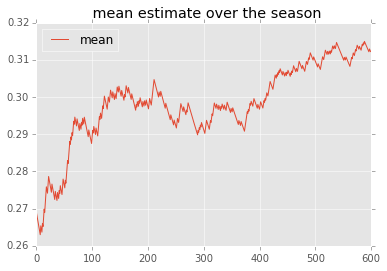

In [18]:
import pandas as pd
list_means = []
for i in range(0,600):
    alpha_param, beta_param = calc_parameters(i)
    if l[i] is 'H':
        alpha_param = alpha_param + 1
    else:
        beta_param =  beta_param + 1
    beta_dist = beta(alpha_param, beta_param)
    list_means.append(get_mean(beta_dist))
pd.Series(list_means).plot(label='mean', legend = True, title = ' mean estimate over the season', xlim = (0,600))

* Mean at the beginning of the season

In [19]:
print list_means[0]

0.269102990033


* Mean at the end of the season

In [20]:
print list_means[-1]

0.312222222222


In [21]:
print pd.Series(list_means).describe()

count    600.000000
mean       0.298043
std        0.010804
min        0.262987
25%        0.293187
50%        0.298118
75%        0.306596
max        0.314961
dtype: float64


* As it can be seen, the mean(in other words, our belief/confidence on the player) fluctuates from 0.2691 from the start of the season, gets a minimum value of 0.2629, goes up to a high of 0.3149 during the end of the season and finishes with an average of 0.3122 at the end of the season.

* Interestingly, we can calculate the actual average he ends up by the end of the season which will be the hits/plays. 
As he has 200 hits out of 600 plays, we notice that the mean is 200/600 which is 0.33. The expected value of the beta distribution (or mean) at the end of the season is lower than the actual value but is definitely higher than the value of the prior i.e. 0.270 , with which we started with!

Thus, beta distributions are extremely useful to model data which consists of set of successes and failures - it has a 
pervasive use in real-life examples. The concept of baseball batting averages perhaps, best illustrates its use.